<a href="https://colab.research.google.com/github/FawwazMayda/BangkitPlantPathology/blob/master/HopeWithTPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.0.2)
Processing /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01/kaggle-1.5.6-py3-none-any.whl
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.6/dist-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [0]:
!pip install -q efficientnet

In [0]:
import os
os.environ['KAGGLE_USERNAME']="medias"
os.environ['KAGGLE_KEY']="5dbaeadf306a45b103216dc5e9fecc15"

In [0]:
!kaggle competitions download -c plant-pathology-2020-fgvc7
!unzip plant-pathology-2020-fgvc7.zip

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import efficientnet.tfkeras as efn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
AUTO = tf.data.experimental.AUTOTUNE

# Create strategy from tpu
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.experimental.TPUStrategy(tpu)

EPOCHS = 40
BATCH_SIZE = 16 * strategy.num_replicas_in_sync

INFO:tensorflow:Initializing the TPU system: grpc://10.36.123.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.36.123.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [0]:
#Dont run if waht to use TPU
EPOCHS = 20
BATCH_SIZE = 8

In [0]:
def format_path(st):
    return'./images/' + st + '.jpg'

submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_paths = train.image_id.apply(format_path).values
test_paths = test.image_id.apply(format_path).values
train_labels = train.loc[:, 'healthy':].values


In [0]:
# Suspecting the error from TPU Systems
train_x,val_x,train_label,val_label = train_test_split(train_paths,train_labels,test_size=0.2)

In [35]:
train_label.shape

(1456, 4)

Image Related Task

In [0]:
image_size = 800
def imageDecode(filename,label=None,image_size=(image_size,image_size)):
  byte = tf.io.read_file(filename)
  img = tf.image.decode_jpeg(byte,channels=3)
  img = tf.cast(img,tf.float32)/255.0
  img = tf.image.resize(img,image_size)

  if label is None:
    return img 
  else:
    return img,label

def augmentData(img,label=None):
  img = tf.image.random_flip_left_right(img)
  img = tf.image.random_flip_up_down(img)

  if label is None:
    return img
  else:
    return img,label

In [0]:
ful_train_dataset=(tf.data.Dataset.from_tensor_slices((train_paths,train_labels)).map(imageDecode).map(augmentData).repeat().shuffle(256).batch(BATCH_SIZE))

train_dataset=(tf.data.Dataset.from_tensor_slices((train_x,train_label)).map(imageDecode).map(augmentData).repeat().shuffle(256).batch(BATCH_SIZE))

val_dataset=(tf.data.Dataset.from_tensor_slices((val_x,val_label)).map(imageDecode).map(augmentData).repeat().shuffle(256).batch(BATCH_SIZE))


test_dataset=(tf.data.Dataset.from_tensor_slices((test_paths)).map(imageDecode).batch(BATCH_SIZE))

Learning rate schedule: 0.0001 to 0.00025 to 0.0001


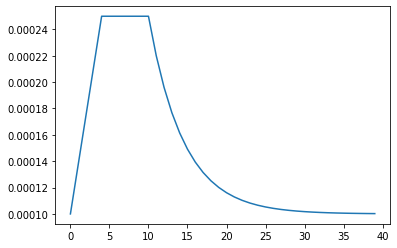

In [0]:
LR_START = 0.0001
LR_MAX = 0.00005 * strategy.num_replicas_in_sync
LR_MAX = 0.00005 * 5
LR_MIN = 0.0001
LR_RAMPUP_EPOCHS = 4
LR_SUSTAIN_EPOCHS = 6
LR_EXP_DECAY = .8

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [0]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

In [0]:
class ProbLayer(tf.keras.Model):
  def __init__(self,**kwargs):
    super(ProbLayer,self).__init__(kwargs)
  """
  def build(self,input_shape):
    super(ProbLayer,self).build(input_shape)
  """
  def call(self,x):
    h = x[:, 0]
    s = x[:, 1]
    r = x[:, 2]
        
    m = s*r*(1-h)
    s = s*(1-h)*(1-m)
    r = r*(1-h)*(1-m)
    if(m>0.9):
      s = 0.
      r = 0.
    return tf.stack([h, m, r, s], axis=-1)
  def compute_output_shape(self, input_shape):
    return (input_shape[0], 4)


Model Phase

In [14]:

model = tf.keras.Sequential([
      tf.keras.applications.InceptionResNetV2(include_top=False,input_shape=(image_size,image_size,3)),
      tf.keras.layers.GlobalMaxPool2D(),
      tf.keras.layers.Dense(4,activation='softmax')                      
  ])

model.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 23, 23, 1536)      54336736  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 6148      
Total params: 54,342,884
Trainable params: 54,282,340
Non-trainable params: 60,544
_________________________________________________________________


In [19]:
STEPS_PER_EPOCH = train_labels.shape[0]//BATCH_SIZE
#STEPS_PER_EPOCH=200
history = model.fit(
    ful_train_dataset, 
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH
)

Epoch 1/20
227/227 [==============================] - 288s 1s/step - loss: 0.3232 - categorical_accuracy: 0.9020
Epoch 2/20
227/227 [==============================] - 288s 1s/step - loss: 0.2779 - categorical_accuracy: 0.9135
Epoch 3/20
227/227 [==============================] - 289s 1s/step - loss: 0.2501 - categorical_accuracy: 0.9174
Epoch 4/20
227/227 [==============================] - 289s 1s/step - loss: 0.2400 - categorical_accuracy: 0.9251
Epoch 5/20
227/227 [==============================] - 288s 1s/step - loss: 0.2105 - categorical_accuracy: 0.9284
Epoch 6/20
227/227 [==============================] - 287s 1s/step - loss: 0.1770 - categorical_accuracy: 0.9466
Epoch 7/20
227/227 [==============================] - 287s 1s/step - loss: 0.2002 - categorical_accuracy: 0.9411
Epoch 8/20
227/227 [==============================] - 286s 1s/step - loss: 0.1558 - categorical_accuracy: 0.9444
Epoch 9/20
227/227 [==============================] - 286s 1s/step - loss: 0.1527 - categorical_

In [10]:

model2 = tf.keras.Sequential([
        efn.EfficientNetB7(
            input_shape=(image_size, image_size, 3),
            weights='noisy-student',
            include_top=False
        ),
        tf.keras.layers.GlobalMaxPooling2D(),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
        
model2.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics=['categorical_accuracy']
    )
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b7 (Model)      (None, 25, 25, 2560)      64097680  
_________________________________________________________________
global_max_pooling2d (Global (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 10244     
Total params: 64,107,924
Trainable params: 63,797,204
Non-trainable params: 310,720
_________________________________________________________________


In [0]:
del(model2)

In [11]:
STEPS_PER_EPOCH = train_labels.shape[0] // 64

history = model2.fit(
    ful_train_dataset, 
    epochs=EPOCHS, 
    steps_per_epoch=227
)

Epoch 1/20


ResourceExhaustedError: ignored

In [0]:
def predToSub():
  probs1 = model.predict(test_dataset, verbose=1)
  sub.loc[:,'healthy':]=probs1
  sub.to_csv('submission_probs1.csv',index=False)

  probs2 = model2.predict(test_dataset, verbose=1)
  sub.loc[:,'healthy':]=probs2
  sub.to_csv('submission_probs2.csv',index=False)

  probs_avg = (probs1+probs2)/2
  sub.loc[:, 'healthy':] = probs_avg
  sub.to_csv('submissio_avg.csv', index=False)

In [24]:
probs1 = model.predict(test_dataset, verbose=1)
submission.loc[:,'healthy':]=probs1
submission.to_csv('submission_probs1.csv',index=False)

228/228 [==============================] - 71s 313ms/step


In [0]:
probs2 = model2.predict(test_dataset, verbose=1)
submission.loc[:,'healthy':]=probs2
submission.to_csv('submission_probs2.csv',index=False)

In [27]:
!kaggle competitions submit -c plant-pathology-2020-fgvc7 -f submission_probs1.csv -m "LB Inceptionv2"

100% 166k/166k [00:09<00:00, 17.5kB/s]
Successfully submitted to Plant Pathology 2020 - FGVC7